In [26]:
import pandas as pd
import re
import geopandas as gpd
import netaddr
from bisect import bisect 
import zipfile
from io import BytesIO
import edgar_utils as edg
from graphviz import Graph, Digraph
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# project: p5
# submitter: walmousa
# partner: none
# hours: 9

In [8]:
df=pd.read_csv("server_log.zip", compression="zip")
df

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,104.197.32.ihd,2017-01-01,00:00:00,0.0,1111711.0,0001193125-12-324016,-index.htm,200.0,7627.0,1.0,0.0,0.0,10.0,0.0,NaN
1,208.77.214.jeh,2017-01-01,00:00:00,0.0,789019.0,0001193125-06-031505,.txt,200.0,46327.0,0.0,0.0,0.0,10.0,0.0,NaN
2,54.197.228.dbe,2017-01-01,00:00:00,0.0,800166.0,0001279569-16-003038,-index.htm,200.0,16414.0,1.0,0.0,0.0,10.0,0.0,NaN
3,108.39.205.jga,2017-01-01,00:00:01,0.0,354950.0,0000950123-09-011236,-index.htm,200.0,8718.0,1.0,0.0,0.0,10.0,0.0,NaN
4,52.45.218.ihf,2017-01-01,00:00:01,0.0,1313918.0,0001209191-06-031555,.txt,200.0,8911.0,0.0,0.0,0.0,10.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174851,218.50.187.afh,2017-01-01,23:59:56,0.0,1295803.0,0001181431-07-073286,.txt,200.0,29312.0,0.0,0.0,0.0,10.0,0.0,NaN
174852,204.212.175.bch,2017-01-01,23:59:57,0.0,89439.0,0001140361-14-029415,.txt,200.0,2165.0,0.0,0.0,0.0,10.0,0.0,NaN
174853,157.55.39.jad,2017-01-01,23:59:58,0.0,1253986.0,0001104659-12-032900,a12-8801_1ex31d2.htm,301.0,630.0,0.0,0.0,0.0,10.0,0.0,NaN
174854,94.156.218.jad,2017-01-01,23:59:58,0.0,1591913.0,0001615774-16-009113,-index.htm,200.0,7037.0,1.0,0.0,0.0,10.0,0.0,NaN


In [9]:
#Q1:
total_size=0
for idx in range(len(df)):
    total_size+=int(df["size"][idx])
    
total_size

24801002666

In [10]:
#Q2:

new_df=df.value_counts(subset="ip")[:10]
new_df
q2_dict={}
for idx in range(len(new_df)):
    q2_dict[new_df.keys()[idx]]=new_df[idx]
    
q2_dict

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [11]:
#Q3:
total_count=0
bad_requests=0
for idx in range(len(df)):
    total_count+=1
    if int(df["code"][idx])>=400:
        bad_requests+=1
        
req_frac=bad_requests/total_count
req_frac

0.03466852724527611

In [12]:
#Q4:
file_counts = df.groupby(['cik', 'accession', 'extention']).size()
most_frequent_file = file_counts.idxmax()
result=str(most_frequent_file[0])[:-2] +"/"+most_frequent_file[1]+"/"+most_frequent_file[2]
result

'1627631/0001627631-15-000004/.txt'

In [13]:
#Q5:

automated_count = len(df[df['crawler']!=0])
automated_count

971

In [14]:
#Q6:
ip_counts = df.groupby('ip').size()
ip_regions = ip_counts.index.map(edg.lookup_region)
most_frequent_region = ip_regions.value_counts().idxmax()
ip_dict={}

for idx in range(len(ip_counts)):
    region=edg.lookup_region(ip_counts.keys()[idx])
    if region in ip_dict:
        ip_dict[region]+=1
    else:
        ip_dict[region]=1
    
most_frequent_region
most_frequent=max(ip_dict, key=ip_dict.get)
most_frequent

'United States of America'

In [15]:
#Q7:

ip_counts = df.groupby('ip').size()
ip_regions = ip_counts.index.map(edg.lookup_region)

high_volume_ips = (ip_counts >= 1000).groupby(ip_regions).sum()

region_counts = ip_regions.value_counts()
high_volume_fractions = high_volume_ips / region_counts
high_volume_fractions_dict = high_volume_fractions.to_dict()

print("The fraction of high-volume IPs in each region is:")
high_volume_fractions_dict

The fraction of high-volume IPs in each region is:


{'-': 0.0,
 'Algeria': 0.0,
 'Angola': 0.0,
 'Armenia': 0.0,
 'Australia': 0.07692307692307693,
 'Austria': 0.0,
 'Bangladesh': 0.0,
 'Brazil': 0.0,
 'Bulgaria': 0.3333333333333333,
 'Canada': 0.017857142857142856,
 'China': 0.006864988558352402,
 'Croatia': 0.0,
 'Cyprus': 0.0,
 'Czechia': 0.0,
 'Denmark': 0.0,
 'Egypt': 0.0,
 'Estonia': 0.0,
 'Finland': 0.0,
 'France': 0.0036900369003690036,
 'Germany': 0.0,
 'Greece': 0.0,
 'Honduras': 0.0,
 'Hong Kong': 0.0,
 'Hungary': 0.0,
 'India': 0.058823529411764705,
 'Indonesia': 0.0,
 'Iraq': 0.0,
 'Ireland': 0.3125,
 'Israel': 0.0,
 'Italy': 0.0,
 'Japan': 0.0,
 'Jersey': 0.0,
 'Jordan': 0.0,
 'Korea (Republic of)': 0.2,
 'Latvia': 0.0,
 'Lebanon': 0.0,
 'Liberia': 0.0,
 'Luxembourg': 0.0,
 'Malaysia': 0.0,
 'Mexico': 0.0,
 'Mongolia': 0.0,
 'Morocco': 0.0,
 'Netherlands': 0.0,
 'Nigeria': 0.0,
 'North Macedonia': 0.0,
 'Pakistan': 0.0,
 'Philippines': 0.0,
 'Poland': 0.0,
 'Portugal': 0.0,
 'Romania': 0.0,
 'Russian Federation': 0.0,
 'Sa

In [16]:
files_dict={}
with zipfile.ZipFile("docs.zip") as z:
    for file in z.namelist():
        content=z.read(file)
        files_dict[file]=edg.Filing(str(content))

In [17]:
#Q8:
q8=files_dict["850693/0000850693-07-000159/-index.htm"]

dates_q8=q8.dates
dates_q8


['2007-07-25', '2007-07-25', '2007-07-23']

In [18]:
#Q9:

states_d={}
for file in files_dict:
    if files_dict[file].state()==None:
        pass
    elif files_dict[file].state() not in states_d:
        states_d[files_dict[file].state()]=1
    else:
        states_d[files_dict[file].state()]+=1

states_d

{'CA': 92,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CO': 25,
 'NY': 83,
 'TX': 67,
 'FL': 21,
 'AL': 1,
 'IN': 5,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 9,
 'IL': 25,
 'GA': 9,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [19]:
#Q10: 

sic_d={}
for file in files_dict:
    if files_dict[file].sic==None:
        pass
    elif files_dict[file].sic not in sic_d:
        sic_d[files_dict[file].sic]=1
    else:
        sic_d[files_dict[file].sic]+=1

sic_d

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [20]:
#Q11:

result=str(most_frequent_file[0])[:-2] +"/"+most_frequent_file[1]+"/"+most_frequent_file[2]
file_counts = df.groupby(['cik', 'accession', 'extention']).size()
count=0
re_d={}
for idx in range(len(df)):
    url=str(df["cik"][idx])[:-2] +"/"+df["accession"][idx]+"/"+df["extention"][idx]
    if url in files_dict.keys() and files_dict[url].sic !=None:
        if files_dict[url].sic not in re_d:
            re_d[files_dict[url].sic]=1
        else:
            re_d[files_dict[url].sic]+=1

re_d

{4931: 70,
 1000: 273,
 6021: 204,
 7371: 229,
 2860: 226,
 6211: 237,
 2834: 984,
 1389: 656,
 4522: 22,
 6282: 171,
 6022: 379,
 1700: 31,
 6331: 91,
 4813: 4,
 2836: 429,
 3620: 50,
 1311: 550,
 4841: 108,
 3272: 81,
 7200: 94,
 6513: 38,
 7374: 94,
 3510: 66,
 4512: 42,
 3826: 56,
 3678: 4,
 4911: 8,
 2510: 171,
 6798: 90,
 7830: 62,
 3571: 6,
 6221: 85,
 3621: 38,
 3695: 55,
 3590: 24,
 6321: 21,
 4812: 4,
 3312: 31,
 3842: 87,
 2870: 2,
 4955: 23,
 7370: 39,
 1040: 2,
 900: 39,
 4833: 7,
 6029: 83,
 3990: 34,
 5311: 90,
 5944: 33,
 3663: 23,
 8742: 27,
 5621: 99,
 8090: 32,
 4412: 43,
 8731: 25,
 7373: 48,
 8711: 2,
 6411: 3,
 3669: 2,
 5172: 36,
 3825: 164,
 3559: 20,
 2080: 1,
 3541: 1,
 7389: 26,
 2711: 1,
 7812: 25,
 7350: 1,
 1400: 3,
 5900: 35,
 3829: 73,
 5812: 19,
 3845: 2,
 6770: 2,
 3841: 14,
 7990: 1,
 2911: 1,
 6799: 46,
 1382: 2,
 3679: 5,
 3721: 1,
 5122: 34,
 5990: 1,
 1531: 4,
 5731: 1,
 5531: 1,
 6324: 30,
 2750: 1,
 4213: 35,
 1381: 31,
 2030: 1,
 3714: 1,
 7372

In [21]:
#Q12:

df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour

hour_counts = df['hour'].value_counts().sort_index()
hours_dict = hour_counts.to_dict()

hours_dict

C:\Users\walee\AppData\Local\Temp\ipykernel_6312\2718002.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

In [22]:
countries=["Australia", "France", "Viet Nam"]
countries_dict={}

file_counts = df.groupby(['cik', 'accession', 'extention']).size()
count=0
for idx in range(len(df)):
    url=str(df["cik"][idx])[:-2] +"/"+df["accession"][idx]+"/"+df["extention"][idx]
    if url in files_dict.keys() and files_dict[url].state() !=None:
        if edg.lookup_region(df["ip"][idx]) in countries:
            if edg.lookup_region(df["ip"][idx]) not in countries_dict:
                countries_dict[edg.lookup_region(df["ip"][idx])]= [files_dict[url].state()]
            elif files_dict[url].state() not in countries_dict[edg.lookup_region(df["ip"][idx])]:
                    countries_dict[edg.lookup_region(df["ip"][idx])].append(files_dict[url].state())
            
countries_dict

{'France': ['NJ', 'CA'], 'Australia': ['NY'], 'Viet Nam': ['CA', 'VA']}

In [27]:
#Q13:
dg=Digraph()
for country in countries_dict:
    dg.node(country)
    for state in countries_dict[country]:
        dg.node(state)
        dg.edge(country, state)

dg

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [28]:
#Q14:

addy_counts={}
for idx in range(len(df)):
    url=str(df["cik"][idx])[:-2] +"/"+df["accession"][idx]+"/"+df["extention"][idx]
    if url in files_dict.keys():
        for addy in files_dict[url].addresses:
            if addy in addy_counts:
                addy_counts[addy]+=1
            else:
                addy_counts[addy]=1


over_225={}

for addy in addy_counts:
    if addy_counts[addy]>=225:
        over_225[addy]=addy_counts[addy]
        
over_225

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277}

C:\Users\walee\AppData\Local\Temp\ipykernel_6312\1559047889.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zips["zip"][idx]=float(curr_zip)


(35.0, 50.0)

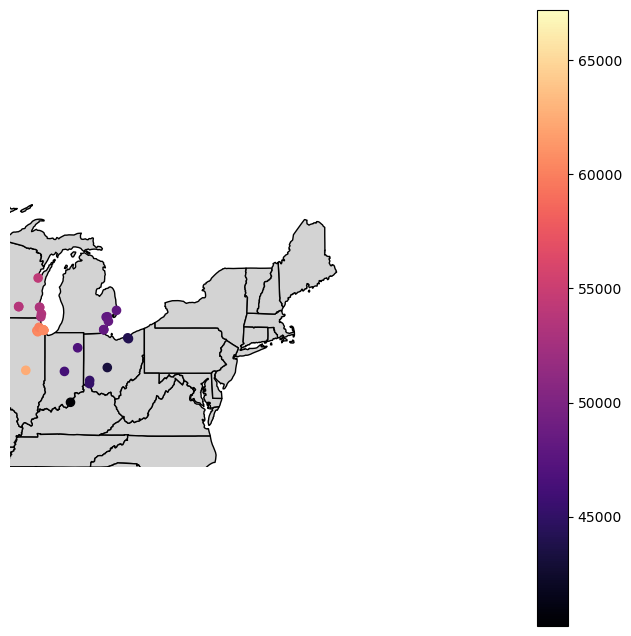

In [29]:
#Q15:

map1 = gpd.read_file("shapes/cb_2018_us_state_20m.shp")
zips = gpd.read_file("locations.geojson")

zips["zip"]=float(0)
for idx in range(len(zips)):
    match=re.search(r'\d{5}(?:-\d{4})?$', zips["address"][idx])
    if match!=None:
        curr_zip= (re.search(r'\d{5}(?:-\d{4})?$', zips["address"][idx]).group())
        if len(curr_zip)>5:
            curr_zip=curr_zip[:5]
        zips["zip"][idx]=float(curr_zip)

for idx in range(len(zips)):
    if  int(zips["zip"][idx]) <40000 or int(zips["zip"][idx]) >70000:
        zips=zips.drop(idx)
    
ax = map1.plot(color="lightgray", edgecolor="k", figsize=(8,8))
zips.plot(ax=ax, column=zips["zip"], markersize=35, legend=True, cmap="magma")

ax.set_axis_off()
ax.set_xlim(-90, -55)
ax.set_ylim(35, 50)